In [25]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.model_selection import  train_test_split
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [26]:
K = 5

In [27]:
# generate synthetic two-dimensional data 
X, y = make_blobs(n_samples = 1000, centers=K, random_state=1) # build the clustering model 

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [29]:
plt.scatter(X_train[:,0],X_train[:,1])
plt.show()

In [30]:
from sklearn.cluster import KMeans
elbow = [] 
for i in range(2, 15): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(pd.DataFrame(X_train)) 
    elbow.append(kmeans.inertia_)

<IPython.core.display.Javascript object>


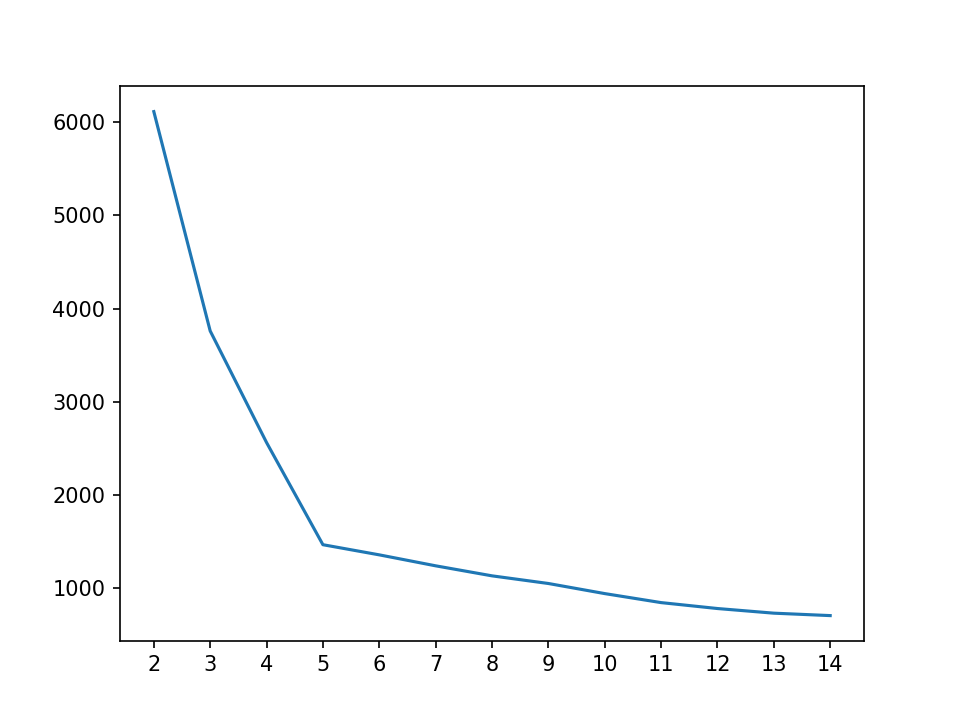

In [31]:
plt.figure()
plt.plot(elbow)
plt.xticks(np.arange(0,13),np.arange(2,15))
plt.savefig("elbow.png")
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X_train)

KMeans(n_clusters=5)

In [34]:
y_train_hat = kmeans.fit_predict(X_train)

In [35]:
df_concat = pd.DataFrame(np.hstack([X_train,np.expand_dims(y_train_hat,axis=1)]), columns=["x","y","class"])

<IPython.core.display.Javascript object>


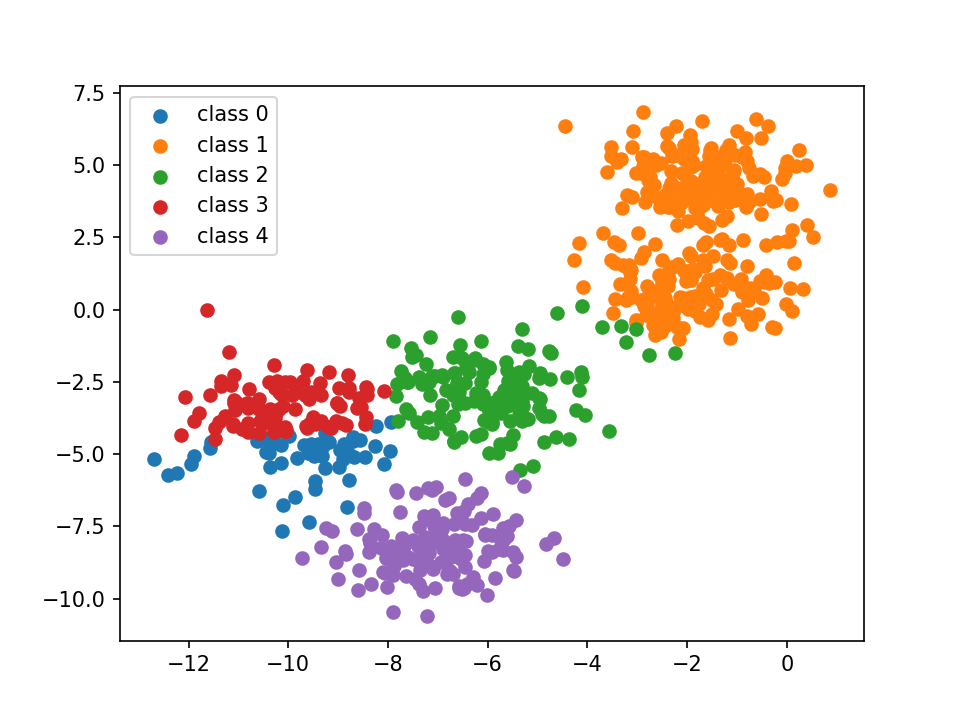

In [36]:
plt.figure()
for i in sorted(df_concat["class"].unique().astype(int)):
    plt.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i))
plt.legend()

<IPython.core.display.Javascript object>


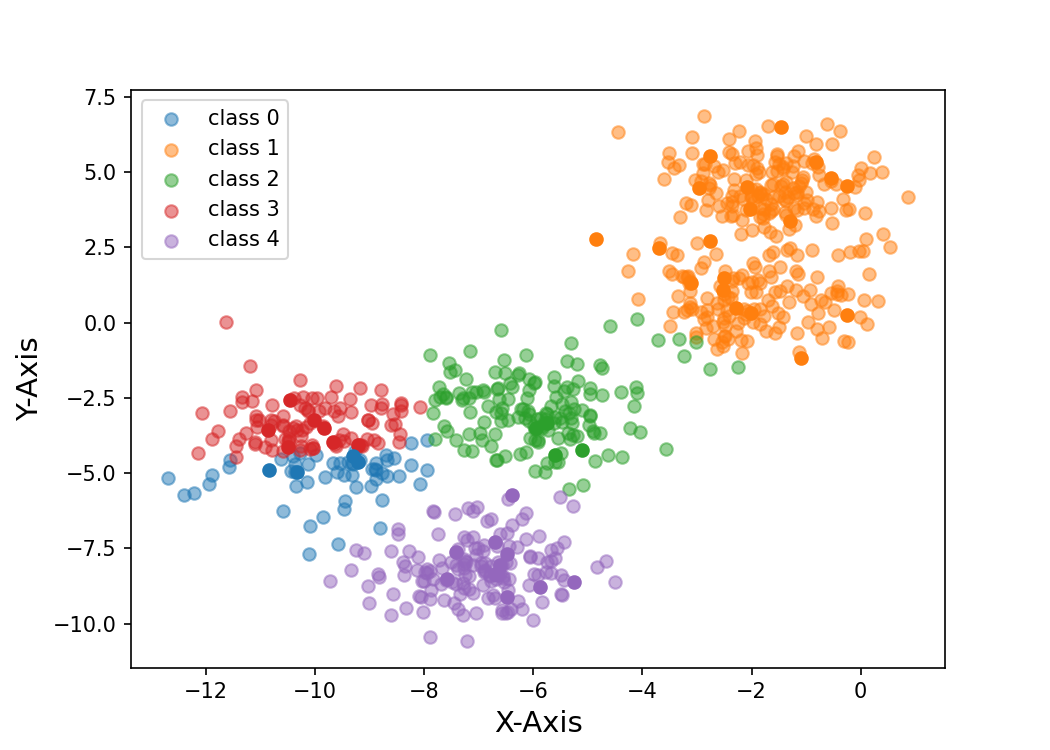

KeyboardInterrupt: 

In [37]:
%matplotlib notebook

figure, ax = plt.subplots(figsize=(7,5))
plt.ion()


for i in sorted(df_concat["class"].unique().astype(int)):
    ax.scatter(x=df_concat[df_concat["class"]==i].iloc[:,0], y=df_concat[df_concat["class"]==i].iloc[:,1], color="C{}".format(i), label="class {}".format(i), alpha=0.5)


plt.xlabel("X-Axis",fontsize=14)
plt.ylabel("Y-Axis",fontsize=14)
plt.legend()

for j in X_test:

    plt.scatter(x=j[0],y=j[1], color="C{}".format(kmeans.predict(np.expand_dims(j,0))[0]))
    figure.canvas.draw()
    figure.canvas.flush_events()
    #time.sleep(0.1)
    